#Aviv Shuster, 316406701

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from datetime import datetime,date

In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<div dir=rtl>

**סקירת מאפייניו של בסיס הנתונים:**

>1. App:  שם האפליקציה, שדה אלפא נומרי אשר אותו יש לקודד. כמובן יהיה רלוונטי  לניבוא הדירוג עבור אותה אפליקציה.  
2. Catagory: מתאר את הקטגוריה אלייה משוייכת האפליקציה. הנ"ל כשמו כן הוא- משתנה קטגוריאלי אותו נצטרך לקודד כי המודל לא ידע לעבוד עם מחרוזות. אני צופה שאכן לעמודה זו יש חשיבות על טיב התוצאה כי גובה הדירוג של אפליקציה יכול לנבוע ממאפיינים רבים, כשאחד מהם הוא שעבור אפליקציות של ז'אנר מסוים, קהל היעד פחות ביקורתי ויותר תומך מאשר באפליקציות בדומיין אחר בהן קהל היעד דורש יותר וביקורתי יותר ולכן מדרג לחומרה (הנ"ל כמובן ייבדק בהמשך).
3. Rating: עמודת ה- label. השדה הנ"ל הינו רציף ונומרי. נשאף שהמודל ידע לנבא את ערכייה בצורה המדויקת ככל הניתן, על ה- subset של ה-test (לבסוף). מכילה ערכי null אותם נצטרך להשלים בדרך כלשהי או במקרה קיצוני יותר, לבדוק האם בכלל רלוונטית למודל (נשאף כמובן לכלול אותה במודל ולעשות את השינויים הרלוונטים בה על מנת לנצל את כל הדאטא הקיים).
4. Reviews: מתארת את כמות הביקורות הנרשמו פר אפליקציה. השדה הנ"ל הינו רציף ונומרי. לעניות דעתי, לעמודה זו חשיבות גבוהה מאוד לטיב ניבוא הדירוג, בשל העובדה שלכמות הביקורות הנכתבות על שירות מסוים, יש השפעה על דירוג של משתמשים אחרים וכמובן משקף את טיבה. 
5. Size: גודל האפליקצייה ב- Mb. הנ"ל שדה אלפא נומרי. יש להמיר את האות "M" להכפלה של המספר ב 10 בחזקת 6, כך שהשדה יהיה נומרי בלבד. יש לבדוק האם שדה זה רלוונטי לתוצאות המודל (אולי גודל קובץ קטן, ייחשב טוב יותר עבור הדירוג כי האפליקצייה תתפוס פחות מקום).
6. Installs: מספר התקנות פר אפליקציה. הנ"ל שדה קטגוריאלי (טקסט) אותו יש לקודד (ככל הנראה) לקטגוריות של טווחים, כלומר, נגיד מ- 0 עד 10,000 ו- 10,000 עד 500,000 וכך הלאה.
7. Type: שדה המציין האם האפליקציה חינמית או בתשלום. שדה זה הינו אלפא נומרי אותו יש לקודד לנומרי. כנראה ששדה זה משפיע על הדירוג כי אנשים אולי יעדיפו אפליקציה חינמית. חסר לעמודה זו ערך יחיד אותו יש להשלים ע"י אחת השיטות הקיימות.
8. Price: מחיר האפליקציה. שדה אלפא נומרי. יש להוריד את סימן הדולר לפני למידה של המודל (בכדי שהוא יעבוד רק עם ערכים נומריים). כמובן שמשפיע על דירוג האפליקציה.
9. Content Rating: קבוצות גילאים שמדרגים (קטגוריאלי), טקסטואלי. יש לקודד לערכים נומריים. אופי המדרג ככל הנראה משפיע על אופן הדירוג. אולי צעירים נוטים לדרג בצורה קיצונית לחיוב או לחומרה ואילו מבוגרים הינם יותר מתונים. אולי מבוגרים יותר הינם יותר ביקורתיים מצעירים. חסר לעמודה זו ערך יחיד אותו יש להשלים ע"י אחת השיטות הקיימות.
10. Genres: קטגוריות נוספות שהאפליקציה משוייכת אליהן בנוסף לקטגוריה הראשית. הנ"ל שדה אלפא נומרי (טקסטואלי) אותו יש לקודד לערכים נומריים. יש לבחון רלוונטיות השדה, בעיקר כי יש את השדה: Catagory שמאוד דומה לשדה זה.
11. Last Updated: תאריך עדכון גרסה אחרון. שדה אלפאנומרי המציין את התאריך הנ"ל אותו יש לקודד לערך נומרי. יש לבחון את רלוונטיות השדה לדירוג האפליקציה (מוטל בספק). 
12. Current Ver: גרסה נוכחית של האפליקציה. שדה אלפא נומרי הכולל גם שדות טקסטואלים בלבד. אולי יש לקודד שדה זה לטווחי גרסאות ואיפה שהשדה הוא טקסט בלבד, יש להשלים ערכים באחת מהשיטות שלמדנו.
יש לבחון רלוונטיות שדה זה לדירוג האפליקציה- לא בטוח שמס' הגרסה, נותן אינדקציה כלשהי על טיב האפליקציה (לעומת תאריך עדכון אחרון שמלמד אולי על תחזוקה ראויה של האפליקציה ושדרוג מתמיד שלה מצד החברה).
13. Android Ver: גרסת האנדרואיד הקיימת, שדה אלפא נומרי אותו אולי יש לקדד לטווחי גרסאות. גם כאן לא בטוח ששדה זה נותן אינדקציה אמיתית על טיב האפליקציה (מאותה הסיבה של הגרסא העדכנית - סעיף 12).


<div dir=rtl>

**סקירת שיטות קידוד (encoding):**

>1. Label encoding: בגישה זו ישנה המרה של כל ערך בעמודה למספר. ישנו החיסרון בשיטה זו, האומר שהערכים הנומריים יכולים להיות מפוענחים בצורה שגויה ע"י אלגוריתמים, ככאלה שיש להם היררכיה או סדר מסוים. לדוגמא, 
במידה ונבחר לקודד למספר רץ (לדוגמא מ-1 עד 6), הנ"ל יכול ליצור בעייה של יחס/השוואה בין הערכים הנומריים שהקצנו לשדות (בטעות נקצה יותר "משקל" לערכים מסויימים על פני האחרים).
גישה זו דורשת שעמודה זו תהייה קטגוריאלית, לפני שמשתמשים בה לקידוד ול-fit_transform על הדאטה.
2. One-Hot Encoding: בגישה זו כל ערך קטגוריאלי מומר לעמודה חדשה עם הערך 1 או 0 (כלומר true/false). כלומר לפיצ'ר אחד יהיה הערך '1' ולשאר יהיה '0'.
על אף שגישה זו מעלימה את בעיית ההיררכיה והסדר, יש לה את החיסרון של הוספת עמודות נוספות לדאטה סט שלנו. הנ"ל יכול לגרום לגדילה משמעותית מאוד בכמות העמודות בדאטה סט, אם ישנם הרבה ערכים ייחודיים בעמודה הקטגוריאלית הזו.

**מתי נשתמש בכל אחת משיטות אלה:**

>1. Label encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **היררכי** (כמו ארוחות ביום בוקר-צהריים-ערב או בתי ספר יסודי-חטיבה-תיכון וכ'ו). בנוסף, כאשר מספר הקטגוריות בעמודה הינו גדול, כי השיטה One-Hot Encoding תגדיל במקרה זה את הדאטה סט בצורה מאוד משמעותית וזה ישליך על צריכת זיכרון גבוהה.
2. One-Hot Encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **לא היררכי** (כמו למשל מדינות שונות בעולם או סוגי מכוניות שונים ועוד).
בנוסף, כאשר מספר הקטגוריות בעמודה הינו קטן, כך שגישה זו תמומש ללא פגיעה בצריכת הזיכרון ובגדילה משמעותית של הדאטה סט.

<div dir=rtl>

לפני שאתחיל, **הערה לבודק**: בכדי להמנע מיצירת שני דאטה פריימים חדשים עבור כל שיטת קידוד, ומהעובדה שישנם שדות אשר צריכים לעבור קידוד ספציפי ולא את השני (משיקולי "משקל" או היררכיה או כמות ערכים יוניקית שתשפיע על צריכת זיכרון ועוד).
כמובן שאסביר בהרחבה את השיקולים בבחירת שיטת הקידוד המתאימה תוך פירוט היתרונות והחסרונות.

### Data analysis + Feature Engineering

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# checking the amount of missing values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Percentage of Rating's missing values: (1474/10841)*100% = 13.6 % <br>Percentage of Type's missing values: (1/10841)*100% = 0.009 %
<br>Percentage of Content Rating's missing values: (1/10841)*100% = 0.009 %
<br>Percentage of Current Ver's missing values: (8/10841)*100% = 0.073 %
<br>Percentage of Android Ver's missing values: (3/10841)*100% = 0.027 %

In [ ]:
# The label column!
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [ ]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

<div dir=rtl>
ניתן לראות שעמודת ה Rating  חסרה הרבה ערכים ביחס לאחרות.
כמו כן, ערכי עמודה זו הינם נומרים ורציפים, אשר נעים על פחות או יותר אותו הscale. על כן, אבחר למלא את הערכים החסרים ע"י ממוצע, mean, של כל עמודה זו. כמובן שלאחר כל ניקיון הדאטה והencoding שאעשה, אראה ע"י מודל, האם בחירה זו התבררה כנכונה.

In [ ]:
# in the cell above, I see that there is an unusual Rating value = 19, so i'll check on which app he is.
print(df[df.Rating > 5])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


<div dir=rtl>
 ניתן לראות שישנה אפליקציה, אשר חורגת מהדירוג המקסימלי 5.0 (בשורה מס' 10472) , לכן, בשל חריגות שורה זו, נמחק אותה מהדאטה סט.<br>בנוסף, נראה שהערך החסר בפיצ'ר Content Rating גם כן קיים באותה שורה (10472) ועל כן ניפתר גם מהערך החסר של פיצ'ר זה (וגם מערך חסר של Android Ver)

In [ ]:
# filling the missing values with the mean of the column
rating_mean_col= df.Rating.mean()
df.Rating.fillna(rating_mean_col, inplace=True)

In [ ]:
df.drop([10472],inplace=True)

In [ ]:
df['Rating'].describe()

count    10840.000000
mean         4.191972
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

<div dir=rtl>
גרף המתאר את התפלגות העמודה Rating:

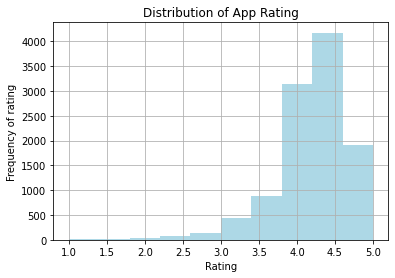

In [ ]:
plt.hist(df['Rating'], color="lightblue")
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title('Distribution of App Rating')
plt.grid(True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

<div dir=rtl>
אוותר על עמודת ה- Current Ver בשל הסיבות הבאות: 
<br>1. פורמט השדה הינו לא אחיד ויש בו ערכים בעייתים ושונים (כמו beta או new version או כל מיני מילים רנדומליות במקומות שונים בשדה).
<br>2.לא למדנו regex וזה פתרון שכנראה יכול לעבוד.
<br>3. לפיצ'ר כזה ככל הנראה אין חשיבות גדולה לדירוג האפליקציה (כי לרוב המשתמשים אם לא כולם, השדה הזה לא מהווה אינדיקציה לאיכות/ תחזוקת האפליקציה אלא שדות כדוגמת Last Update שמראה שהאפליקציה מתפתחת ומתוחזקת בתדירות גבוהה), כלומר הגרסא הנוכחית של האפליקציה ככל הנראה לא מהווה גורם משפיע על גובה הדירוג.
<br> כמובן שאת השלכות הבחירה הנ"ל אראה בביצועי המודל בהמשך.

In [ ]:
df.drop(labels=["Current Ver"],axis=1,inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

ראשית, אמלא את הערכים החסרים (יש שניים כאלה) ע"י הערך השכיח בעמודה.

In [ ]:
df['Android Ver'].value_counts().idxmax() #The  most common value in the coulmn

'4.1 and up'

In [ ]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",NaN


In [ ]:
df['Android Ver'].loc[4453] = '4.1 and up'
df['Android Ver'].loc[4490] = '4.1 and up'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['Android Ver'].loc[4453]
df['Android Ver'].loc[4490]

'4.1 and up'

In [ ]:
df['Android Ver'].notnull().any()

True

In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

<div dir=rtl>
כעת, לאחר שפתרתי את השלמת החסרים, אקודד את השדה הנ"ל לפי Label Encoding (למרות שהנ"ל ייצור משקל- לדעתי זה עדיף מאשר לבצע One-Hot encoding כי יש לשדה זה המון ערכים יוניקים מה שייצור כמות גדולה של עמודות חדשות. כמו כן הפיצ'ר הנ"ל קטגוריאלי היררכי ולכן ראוי להשתמש בשיטת ה- label encoding!).
<br>בנוסף, במטלה זו התבקשנו כן לנסות ולמצות את הפיצ'ר Android Ver ולכן אני מנסה לטפל בפיצ'ר זה, אך לדעתי ניתן להוריד אותו מהדאטה סט בשל חוסר רלוונטיות לביצועי המודל (הנחה שכמובן אבדוק בהמשך עם וללא פיצ'ר זה).

In [ ]:
le = LabelEncoder()
df['Android Ver'] = le.fit_transform(df['Android Ver'])

In [ ]:
df['Android Ver'].unique()

array([15, 18, 20,  8, 10, 17, 13,  9, 32,  7, 25, 27,  2,  1,  5, 29, 26,
       19, 14,  3, 12, 21, 30, 28, 31, 24, 11,  4, 16, 22,  0,  6, 23])

<div dir=rtl>
כעת אבדוק את התפלגות השדה הנ"ל:
<br>ניתן לראות התפלגות לא אחידה (ולא נורמלית) של גרסאות אנדרואיד

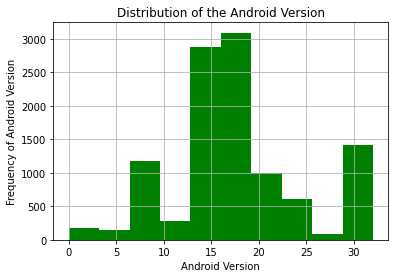

In [ ]:
plt.hist(df['Android Ver'], color="green")
plt.xlabel("Android Version")
plt.ylabel("Frequency of Android Version")
plt.title('Distribution of the Android Version')
plt.grid(True)

<div dir=rtl>
כעת, אבדוק את עמודת ה- Installs: 

In [ ]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [ ]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

<div dir=rtl>
בכדי שהמודל ידע להתמודד עם ערכים אלה, יש להיפטר מה '+' וה- ',' <br>
אשתמש ב lambda אשר תממש את פעולת ההחלפה על כל שורה בצורה איטרטיבית.

In [ ]:
df['Installs'] = df.Installs.apply(lambda val: str(val).replace(',',''))
df['Installs'] = df.Installs.apply(lambda val: str(val).replace('+',''))

In [ ]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

<div dir=rtl>
לפי ה- dtype, ניכר שעמודה זו אינה מוגדרת כנומרית, לכן בשל העובדה שקשה לראות את כל הערכים הקיימים בעמודה זו, יכול להיות מצב שערך כלשהו בעמודה זו אינו נומרי אלא כמחרוזת, לכן אבצע  casting לint לכל העמודה הזו.

In [ ]:
df['Installs'] = df.Installs.apply(lambda val: int(val))

In [ ]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

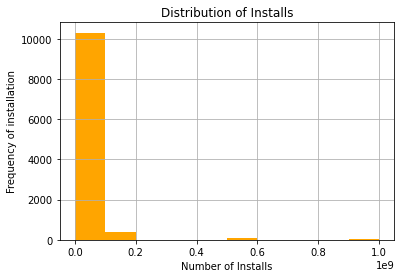

In [ ]:
plt.hist(df['Installs'], color="orange");
plt.xlabel('Number of Installs')
plt.ylabel('Frequency of installation')
plt.title('Distribution of Installs')
plt.grid(True)

<div dir=rtl>
גרף המתאר את התפלגות העמודה Installs:
ניכר כי כמות ההורדות פר אפליקציה, לרוב הינה קטנה ביחס לפעמים שבהן היו מס' הורדות גדול בהרבה, ונעה בין 0 ל 10 מיליון הורדות.

In [ ]:
df['App'].nunique()

9659

In [ ]:
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

<div dir=rtl>
גרף המתאר את 15 האפליקציות עם כמות ההורדות הגדולה ביותר:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'App'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Top downloaded Apps')]

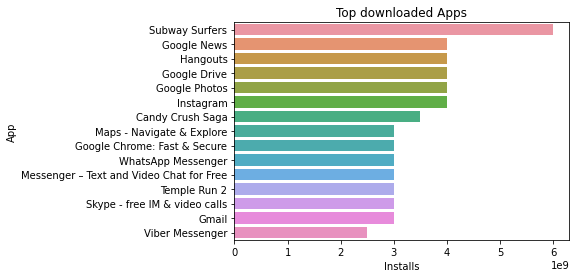

In [ ]:
val = df.groupby("App").Installs.sum().sort_values(ascending=False).head(15)
ax = sns.barplot(val.values,val.index)
ax.set(xlabel='Installs', ylabel='App', title ='Top downloaded Apps')

<div dir=rtl>
כאן בעצם עשיתי group by על עמודת האפליקציות ועמודת ההורדות (כי יש הרי אפליקציות משוכפלות- לא יוניקיות) ובדקתי מה הסכום של כל צימוד כזה. לבסוף לקחתי את 15 האפליקציות המדורגות גבוה ביותר בכמות ההורדות שלהן, בסדר יורד.

<div dir=rtl>
 לעניות דעתי, לשם האפליקציה אין חשיבות לדירוג האפליקציה וכן ניתן לקודד את האפליקציות בשיטת Label Encoding (ולא בשיטת One-Hot כי ישנם הרבה ערכים יוניקים). כמו כן, הרשומות כבר מאונדקסות (index) כך שכל אינדקס נומרי יפוענח בצורה טובה יותר ע"י המכונה הלומדת.
כמו כן, לא התבקשנו במטלה לנסות ובכל זאת למצות את השדה הזה, לכן בשל חוסר הרלוונטיות שלו למודל, אוותר עליו.

In [ ]:
df.drop(labels=["App"],axis=1,inplace=True)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",15
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",15
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",15
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",18
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",20


<div dir=rtl>
כעת, אבדוק את עמודת ה- Reviews: 

In [ ]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object

In [ ]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

<div dir=rtl>
לפי ה- dtype, ניכר שעמודה זו אינה מוגדרת כנומרית, לכן בשל העובדה שקשה לראות את כל הערכים הקיימים בעמודה זו, יכול להיות מצב שערך כלשהו בעמודה זו אינו נומרי (נניח מחרוזת), לכן אבצע  casting לint לכל העמודה הזו.

In [ ]:
df['Reviews'] = df.Reviews.apply(lambda val: int(val))

In [ ]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

<div dir=rtl>
גרף המתאר את התפלגות העמודה Reviews:

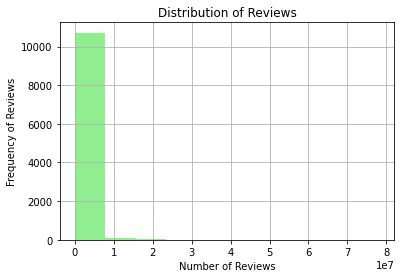

In [ ]:
plt.hist(df['Reviews'], color="lightgreen");
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency of Reviews')
plt.title('Distribution of Reviews')
plt.grid(True)

<div dir=rtl>
ניכר כי כמות הביקורות, לרוב נעה סביב 0 עד 10 מיליון הורדות. כאשר כמות הורדות מעל 10 מיליון, קיימת אך עבור מעט מאוד אפליקציות.

<div dir=rtl>
כעת, אבדוק את עמודת ה- Price: 

In [ ]:
df.Price

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

<div dir=rtl>
בכדי שהמודל ידע להתמודד עם ערכים אלה, יש להיפטר מה '$'.<br>
בנוסף, אבצע casting של העמודה ל float כי הערכים בעמודה זה מכילים ספרות אחרי הנקודה.

In [ ]:
df['Price'] = df.Price.apply(lambda val: str(val).replace('$',''))
df['Price'] = df.Price.apply(lambda val: float(val))

In [ ]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

<div dir=rtl>
גרף המתאר את התפלגות העמודה Price:

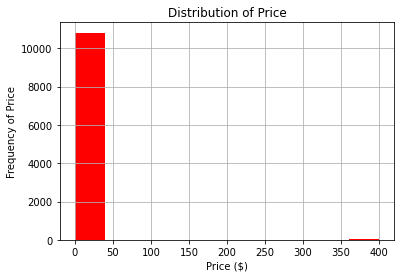

In [ ]:
plt.hist(df['Price'], color="red");
plt.xlabel('Price ($)')
plt.ylabel('Frequency of Price')
plt.title('Distribution of Price')
plt.grid(True)

<div dir=rtl>
ניכר כי מחירי האפליקציות, נעים סביב 0 עד 45 דולר. כאשר מספר קטן של אפליקציות דורשות סכומים של בין 350 ל-400 דולר.

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",15
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",15
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",15
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",18
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",20


In [ ]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
len(df.Category.unique())

33

<div dir=rtl>
עמודת Category מפולגת כך:<br> ניכר שעמודה זו מתפלגת בצורה לא אחידה ונורמלית. כמו כן הקטגוריות המובילות בשכיחותן הן: Game, Family and Tools.

<function matplotlib.pyplot.show>

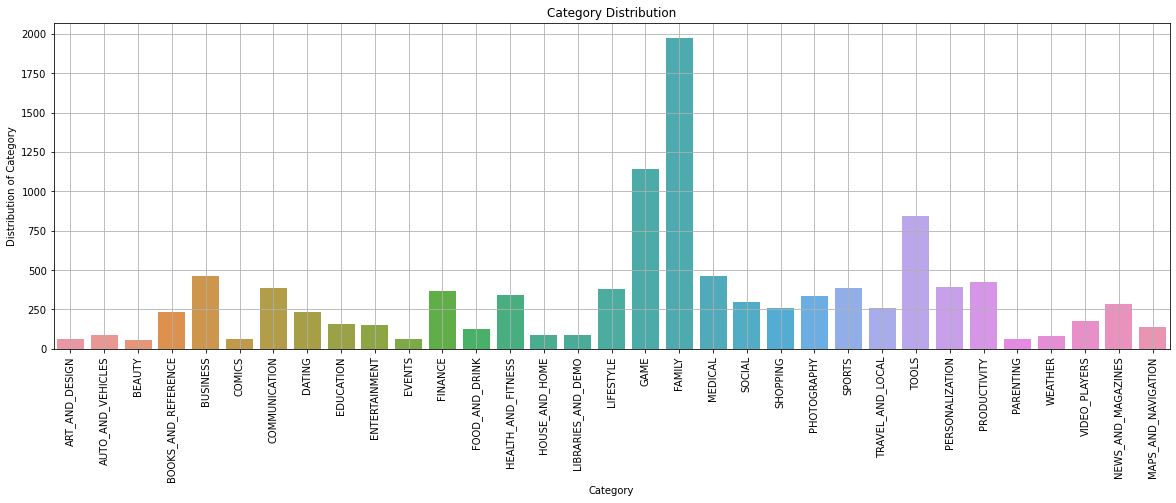

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x="Category",data=df)
ax.set(xlabel='Category', ylabel='Distribution of Category', title ='Category Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid(True)
plt.show


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          10840 non-null  float64
 2   Reviews         10840 non-null  int64  
 3   Size            10840 non-null  object 
 4   Installs        10840 non-null  int64  
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Android Ver     10840 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.2+ MB


<div dir=rtl>
15 האפליקציות המדורגות ביותר ב Google Play: (כלומר gruop by Rating & Category)

Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
SOCIAL                 4.248001
WEATHER                4.239675
SPORTS                 4.218404
PRODUCTIVITY           4.208287
HOUSE_AND_HOME         4.196819
Name: Rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Category'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Top rated Apps')]

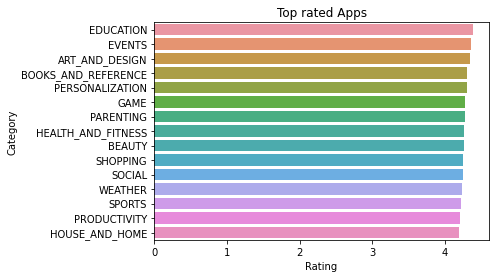

In [ ]:
val = df.groupby("Category").Rating.mean().sort_values(ascending = False).head(15)
print(val)
ax = sns.barplot(val.values,val.index)
ax.set(xlabel='Rating', ylabel='Category', title ='Top rated Apps')

<div dir=rtl>
עמודת ה- Category הינה כשמה כן היא - קטגוריאלית. על כן יש להמיר ערכים אלה לנומריים על מנת שהמודל ידע להתמודד איתה. <br> נבצע encoding באמצעות  One-Hot encoding. <br> ישנו החיסרון שאנו  מוסיפים 33 עמודות לצורך כך, אך בשל העובדה שעמודה זו הינה לא היררכית, על כן מן הראוי שנשתמש בשיטת קידוד זו (לא נרצה ליצור היררכיה ו"משקל" לעמודה זו ע"י Label encoding).

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
category_list = df['Category'].unique().tolist()
category_list = ['category_' + word for word in category_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['Category']]).toarray())
df_temp.rename(columns=lambda i: category_list[i], inplace = True)
df = df.join(df_temp)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Category                      10840 non-null  object 
 1   Rating                        10840 non-null  float64
 2   Reviews                       10840 non-null  int64  
 3   Size                          10840 non-null  object 
 4   Installs                      10840 non-null  int64  
 5   Type                          10839 non-null  object 
 6   Price                         10840 non-null  float64
 7   Content Rating                10840 non-null  object 
 8   Genres                        10840 non-null  object 
 9   Last Updated                  10840 non-null  object 
 10  Android Ver                   10840 non-null  int64  
 11  category_ART_AND_DESIGN       10839 non-null  float64
 12  category_AUTO_AND_VEHICLES    10839 non-null  float64
 13  c

In [ ]:
print(df[df['category_AUTO_AND_VEHICLES'].isnull()])

        Category  Rating  Reviews Size  Installs  Type  Price Content Rating  \
10840  LIFESTYLE     4.5   398307  19M  10000000  Free    0.0       Everyone   

          Genres   Last Updated  ...  category_SPORTS  \
10840  Lifestyle  July 25, 2018  ...              NaN   

       category_TRAVEL_AND_LOCAL  category_TOOLS  category_PERSONALIZATION  \
10840                        NaN             NaN                       NaN   

       category_PRODUCTIVITY  category_PARENTING  category_WEATHER  \
10840                    NaN                 NaN               NaN   

       category_VIDEO_PLAYERS  category_NEWS_AND_MAGAZINES  \
10840                     NaN                          NaN   

       category_MAPS_AND_NAVIGATION  
10840                           NaN  

[1 rows x 44 columns]


<div dir=rtl>
ניכר ששורה מס' 10840 מכילה nan בכל עמודות הקטגוריה ולכן אמחק שורה זו.

In [ ]:
df.drop([10840],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10839
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Category                      10839 non-null  object 
 1   Rating                        10839 non-null  float64
 2   Reviews                       10839 non-null  int64  
 3   Size                          10839 non-null  object 
 4   Installs                      10839 non-null  int64  
 5   Type                          10838 non-null  object 
 6   Price                         10839 non-null  float64
 7   Content Rating                10839 non-null  object 
 8   Genres                        10839 non-null  object 
 9   Last Updated                  10839 non-null  object 
 10  Android Ver                   10839 non-null  int64  
 11  category_ART_AND_DESIGN       10839 non-null  float64
 12  category_AUTO_AND_VEHICLES    10839 non-null  float64
 13  c

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_SPORTS,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.iloc[0]

Category                         ART_AND_DESIGN
Rating                                      4.1
Reviews                                     159
Size                                        19M
Installs                                  10000
Type                                       Free
Price                                       0.0
Content Rating                         Everyone
Genres                             Art & Design
Last Updated                    January 7, 2018
Android Ver                                  15
category_ART_AND_DESIGN                     1.0
category_AUTO_AND_VEHICLES                  0.0
category_BEAUTY                             0.0
category_BOOKS_AND_REFERENCE                0.0
category_BUSINESS                           0.0
category_COMICS                             0.0
category_COMMUNICATION                      0.0
category_DATING                             0.0
category_EDUCATION                          0.0
category_ENTERTAINMENT                  

<div dir=rtl>
כעת, אבדוק את עמודת ה- Geners:

In [ ]:
df['Genres'].isnull().sum()

0

In [ ]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

<function matplotlib.pyplot.show>

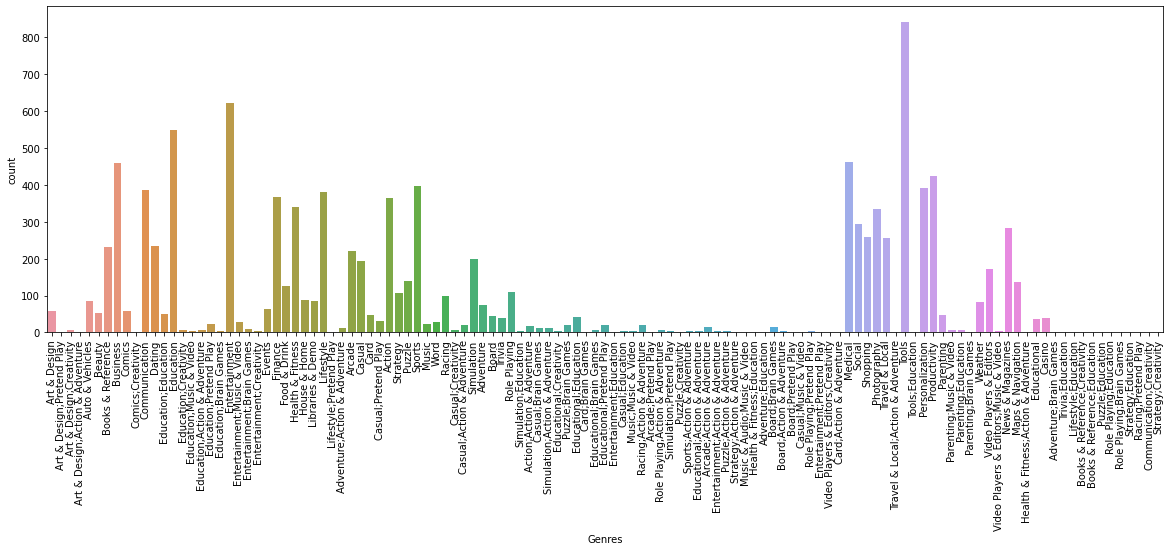

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x="Genres",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show

<div dir=rtl>:
15 הז'אנרים המדורגים הכי גבוה ב Google Play:

<div dir=rtl>
<br> ניכר שעמודה זו מתפלגת בצורה לא אחידה ונורמלית. כמו כן הז'אנרים המובילים בשכיחותם הם: Education, Entertainment and Tools.

Genres
Comics;Creativity                4.800000
Board;Pretend Play               4.800000
Health & Fitness;Education       4.700000
Puzzle;Education                 4.600000
Adventure;Brain Games            4.600000
Strategy;Action & Adventure      4.600000
Music;Music & Video              4.533333
Entertainment;Creativity         4.533333
Tools;Education                  4.500000
Strategy;Education               4.500000
Arcade;Pretend Play              4.500000
Racing;Pretend Play              4.500000
Casual;Brain Games               4.469231
Adventure;Action & Adventure     4.423077
Simulation;Action & Adventure    4.418182
Name: Rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Genres'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Top rated Genres')]

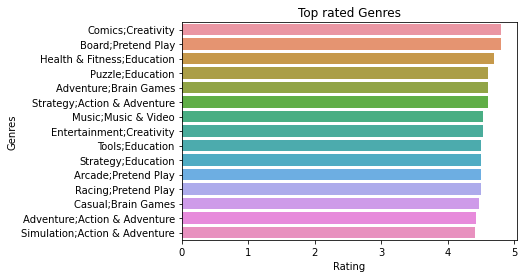

In [ ]:
val = df.groupby("Genres").Rating.mean().sort_values(ascending = False).head(15)
print(val)
ax = sns.barplot(val.values,val.index)
ax.set(xlabel='Rating', ylabel='Genres', title ='Top rated Genres')

<div dir=rtl>
3 הז'אנרים המובילים בדירוגם הם: Comics, Board and Health&Fitness (Educational.

Genres
Parenting;Brain Games                    3.800000
Health & Fitness;Action & Adventure      3.900000
Art & Design;Pretend Play                3.900000
Educational                              3.915316
Educational;Creativity                   3.960000
Video Players & Editors;Music & Video    4.000000
Entertainment;Pretend Play               4.000000
Lifestyle;Pretend Play                   4.000000
Dating                                   4.007864
Role Playing;Pretend Play                4.020000
Board;Action & Adventure                 4.033333
Parenting;Education                      4.053336
Maps & Navigation                        4.065061
Tools                                    4.065765
Video Players & Editors                  4.075145
Name: Rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Genres'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Top rated Genres')]

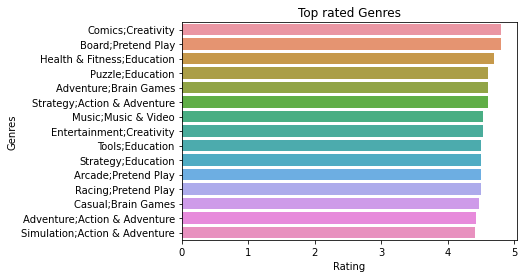

In [ ]:
val2 = df.groupby("Genres").Rating.mean().sort_values(ascending = True).head(15)
print(val2)
ax = sns.barplot(val.values,val.index)
ax.set(xlabel='Rating', ylabel='Genres', title ='Top rated Genres')

<div dir=rtl>
3 הז'אנרים המדורגים בתחתית הם: Parenting, Art&design and Health&Fitness(Action and Adventure).

In [ ]:
len(df['Genres'].unique())

119

<div dir=rtl>
את השדה Genres אבחר לקודד ע"פ Label Encoding בשל העובדה שיש לו הרבה ערכים יוניקים (119) ושהוא שדה קטגוריאלי. אבדוק את ביצועי המערכת בהמשך.

In [ ]:
le = LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [ ]:
df['Genres'].unique()

array([  9,  12,  11,  10,  13,  14,  19,  22,  34,  35,  36,  38,  43,
        39,  42,  44,  40,  45,  41,  52,  57,  54,  55,  59,  60,  61,
        62,  65,  66,  67,  69,   3,   6,  27,  23,  33,   0, 104,  83,
       102,  72, 118,  88,  30,  28,  97,   2,  15, 112,  91,  99,   1,
        29,  98,  49,  85,  50,  25,  48,  51,  56,  31,  74,  89,   8,
        92, 100,  86, 103,  47,   7,  53,  84, 105,  73,  64,   5,  17,
        16,  18,  32,  95,  58, 115,  24,  71, 101,  96,  81, 110, 111,
       108, 109,  80,  82,  76,  79,  78,  77, 117, 114, 116,  75,  70,
        63,  46,  26,   4, 113,  68,  20,  21,  87,  94,  93, 107,  90,
        37, 106])

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_SPORTS,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,9,"January 7, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,12,"January 15, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,9,"August 1, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,9,"June 8, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,11,"June 20, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>
כעת אבדוק את עמודת ה- Content Rating:

Content Rating
Adults only 18+    4.300000
Everyone 10+       4.254557
Teen               4.229366
Everyone           4.187373
Unrated            4.146669
Mature 17+         4.128751
Name: Rating, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Rating'),
 Text(0.5, 0, 'Content Rating'),
 Text(0.5, 1.0, 'Top rated by Content Rating groups')]

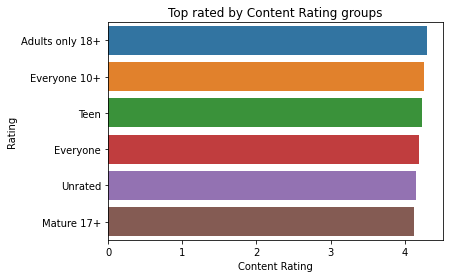

In [ ]:
val = df.groupby("Content Rating").Rating.mean().sort_values(ascending = False).head(6)
print(val)
ax = sns.barplot(val.values,val.index)
ax.set(xlabel='Content Rating', ylabel='Rating', title ='Top rated by Content Rating groups')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10839
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Category                      10839 non-null  object 
 1   Rating                        10839 non-null  float64
 2   Reviews                       10839 non-null  int64  
 3   Size                          10839 non-null  object 
 4   Installs                      10839 non-null  int64  
 5   Type                          10838 non-null  object 
 6   Price                         10839 non-null  float64
 7   Content Rating                10839 non-null  object 
 8   Genres                        10839 non-null  int64  
 9   Last Updated                  10839 non-null  object 
 10  Android Ver                   10839 non-null  int64  
 11  category_ART_AND_DESIGN       10839 non-null  float64
 12  category_AUTO_AND_VEHICLES    10839 non-null  float64
 13  c

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<div dir=rtl>
כפי שניתן לראות, ישנו שדה של Unrated. את כל הערכים החסרים אשלים אליו.<Br> את הערכים של Everyone אין טעם להשאיר בצורה הזו ואקודד אותם מראש ל-0.

In [ ]:
df['Content Rating'] = df['Content Rating'].replace(np.nan, 'Unrated')

In [ ]:
df['Content Rating'] = df['Content Rating'].replace(0, 'Everyone')

<div dir=rtl>
המשתנה Content Rating הינו קטגוריאלי היררכי ועל כן אקודד אותו בעזרת Label Encoding:

In [ ]:
le = LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_SPORTS,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,1,9,"January 7, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,1,12,"January 15, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,1,9,"August 1, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,4,9,"June 8, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,1,11,"June 20, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Content Rating'].unique()

array([1, 4, 2, 3, 0, 5])

<div dir=rtl>
התפלגות הקבוצות לאחר הencoding לצורך ההמחשה:(ניתן גם לפי boxplot)

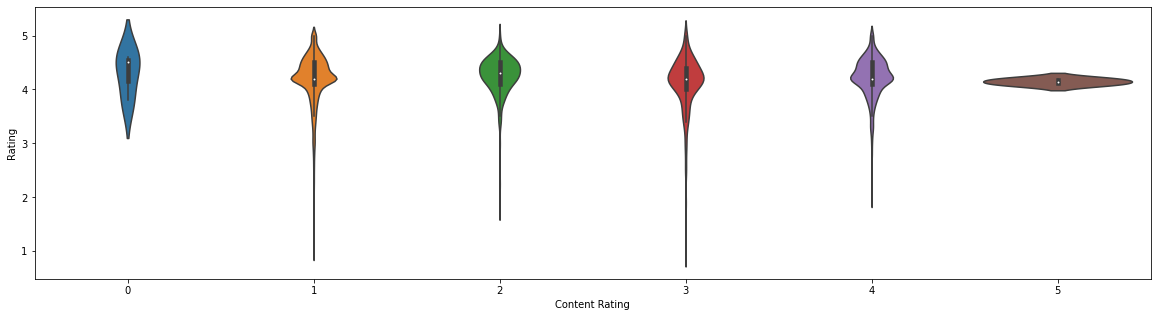

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.violinplot(x="Content Rating",y="Rating",data=df)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

<div dir=rtl>
כעת אבדוק את עמודת ה- Size:

In [ ]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
Name: Size, Length: 10839, dtype: object

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
len(df[df['Size'] == 'Varies with device'])

1695

<div dir=rtl>
עמודת ה- Size הינה עמודה אלפא נומרית אשר מכילה בכל שדה מספר ואות המחובר בקצהו, ומסמל מיליונים/אלפים.<br> כמו כן, ישנו השדה הטקסטואלי Varies with device אותו אחליף למספר 0.

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

<div dir=rtl>
החלפת מספרים עם סיומת K למספרים ללא הסיומת. כלומר חלוקה של כל המספרים בעמודה זו ב-  1024 ביט (ועבור המספרים עם הסיומת M, ה- M יוחלף ב '000' וכך בעצם נחלק מספר שמוצג במיליונים באלף).**כך שלבסוף כל המספרים בעמודה עוברים חלוקה ב-1000 וכך יש מעיין Scaling לעמודה.**<br>כאן המספרים עם הסיומת K עוברים casting to float ועיגול לשלוש ספרות לאחר הנקודה, אחרת המספר לא עובר שינוי.

In [ ]:
df['Size'] = [str(round(float(val.replace("k", ""))/1024, 3)) if ('k' in val) else (val) for val in df['Size']]

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '0.196',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '0.022', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M',
       '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M',
       '6.6M', '5.1M', '61M', '66M', '0.077', '8.4M', '0.115', '44M',
       '0.679',

In [ ]:
df["Size"] = df.Size.apply(lambda val: str(val).replace("M", "000"))

<div dir=rtl>
ישנו השדה הטקסטואלי Varies with device אותו אחליף למספר 0.

In [ ]:
df[df['Size'] == 'Varies with device'] = 0

In [ ]:
df['Size'] = df.Size.apply(lambda val: float(val))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10839
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Category                      10839 non-null  object 
 1   Rating                        10839 non-null  float64
 2   Reviews                       10839 non-null  int64  
 3   Size                          10839 non-null  float64
 4   Installs                      10839 non-null  int64  
 5   Type                          10839 non-null  object 
 6   Price                         10839 non-null  float64
 7   Content Rating                10839 non-null  int64  
 8   Genres                        10839 non-null  int64  
 9   Last Updated                  10839 non-null  object 
 10  Android Ver                   10839 non-null  int64  
 11  category_ART_AND_DESIGN       10839 non-null  float64
 12  category_AUTO_AND_VEHICLES    10839 non-null  float64
 13  c

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_SPORTS,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,1,9,"January 7, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,1,12,"January 15, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,1,9,"August 1, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,4,9,"June 8, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,1,11,"June 20, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>
כעת אבדוק את עמודת ה- Type:

In [ ]:
df['Type'].unique()

array(['Free', 0, 'Paid'], dtype=object)

In [ ]:
df['Type'].value_counts()

Free    8420
0       1695
Paid     724
Name: Type, dtype: int64

<div dir=rtl>
אחליף את כל ערכי האפס לערכי Free ואז אבצע label encoding על מנת לסווג את Free/Paid ב- 0/1

In [ ]:
#df[df['Type'] == 0] = 'Free'
df['Type'] = df.Type.apply(lambda val: str(val).replace('0', 'Free'))

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

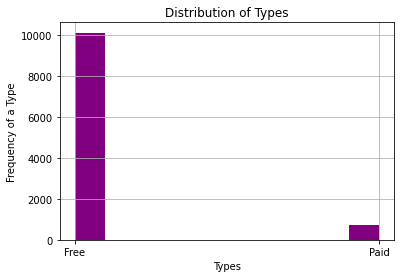

In [ ]:
plt.hist(df['Type'], color="purple");
plt.xlabel('Types')
plt.ylabel('Frequency of a Type')
plt.title('Distribution of Types')
plt.grid(True)

<div dir=rtl>
ניתן לראות שישנם קרוב לעשרת אלפים אפליקציות חינמיות ואילו כמה מאות בודדות של אפליקציות בתשלום.

In [ ]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
df['Type'].unique()

array([0, 1])

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_SPORTS,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,1,9,"January 7, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,1,12,"January 15, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,1,9,"August 1, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,4,9,"June 8, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,1,11,"June 20, 2018",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>
כעת אבדוק את עמודת ה- Last Updated:

In [ ]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [ ]:
df['Last Updated'].value_counts()

0                    1695
August 3, 2018        212
July 31, 2018         204
August 2, 2018        188
August 1, 2018        186
                     ... 
December 15, 2015       1
June 14, 2016           1
October 2, 2015         1
May 25, 2016            1
March 23, 2014          1
Name: Last Updated, Length: 1359, dtype: int64

<div dir=rtl>
עמודה זו הינה אלפא נומרית המכילה מחרוזות.<br>בכדי שהמודל ידע להתמודד עם עמודה זו, אמיר כל שדה כזה אל פורמט של datetime.<br>לאחר מכן אמצא את התאריך הכי עדכני של העמודה ואחסיר ממנו את הערך של ה- last update (שנמצא בפורמט של זמן). בכך אקבל עמודה חדשה המכילה את מס' הימים שעברו מאז עדכון הגרסא האחרון(לכן יופיעו במינוס):

In [ ]:
df['new_date'] = pd.to_datetime(df['Last Updated'])

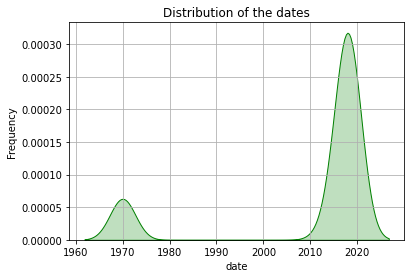

In [ ]:
g = sns.kdeplot(df['new_date'], color="Green", shade = True)
g.set_xlabel('date')
g.set_ylabel('Frequency')
plt.title('Distribution of the dates')
plt.grid(True)

ניתן לראות שהתפלגות הזמנים הינה אחידה סביב 2015 בערך וקיימת חריגה סביבה 1970.

In [ ]:
df['new_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   10839
unique                   1359
top       1970-01-01 00:00:00
freq                     1695
first     1970-01-01 00:00:00
last      2018-08-08 00:00:00
Name: new_date, dtype: object

<div dir=rtl>
ניתן לראות שהפורמט השתנה לשנה-חודש-יום והשעה.<br>כמו כן, היום העדכני ביותר בעמודה זו הינו ה: 2018-08-08

In [ ]:
df['new_date'].max()

Timestamp('2018-08-08 00:00:00')

<div dir=rtl>
לכן, בכדי למצוא את ההפרש בין היום לבין היום שבו בוצעה שדרוג הגרסא האחרון, נבצע:

In [ ]:
# df['new_date'][x] -  df['new'].max()

<div dir=rtl>
את ההפרש הנ"ל יש להמיר לפורמט של ימים בלבד וזה מתאפשר באמצעות Series.dt.days:

In [ ]:
df['last_update_diff'] = (df['new_date'] - df['new_date'].max()).dt.days

In [ ]:
df['last_update_diff'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: last_update_diff, dtype: int64

In [ ]:
df.drop(labels=["Last Updated"],axis=1,inplace=True)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,...,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION,new_date,last_update_diff
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,1,9,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-07,-213
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,1,12,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-15,-205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,1,9,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-08-01,-7
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,4,9,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-08,-61
4,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,1,11,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-20,-49


###Correlation Matrix 
<div dir=rtl>

כעת, אבחן את **הקורלציות** בין הפיצ'רים השונים:

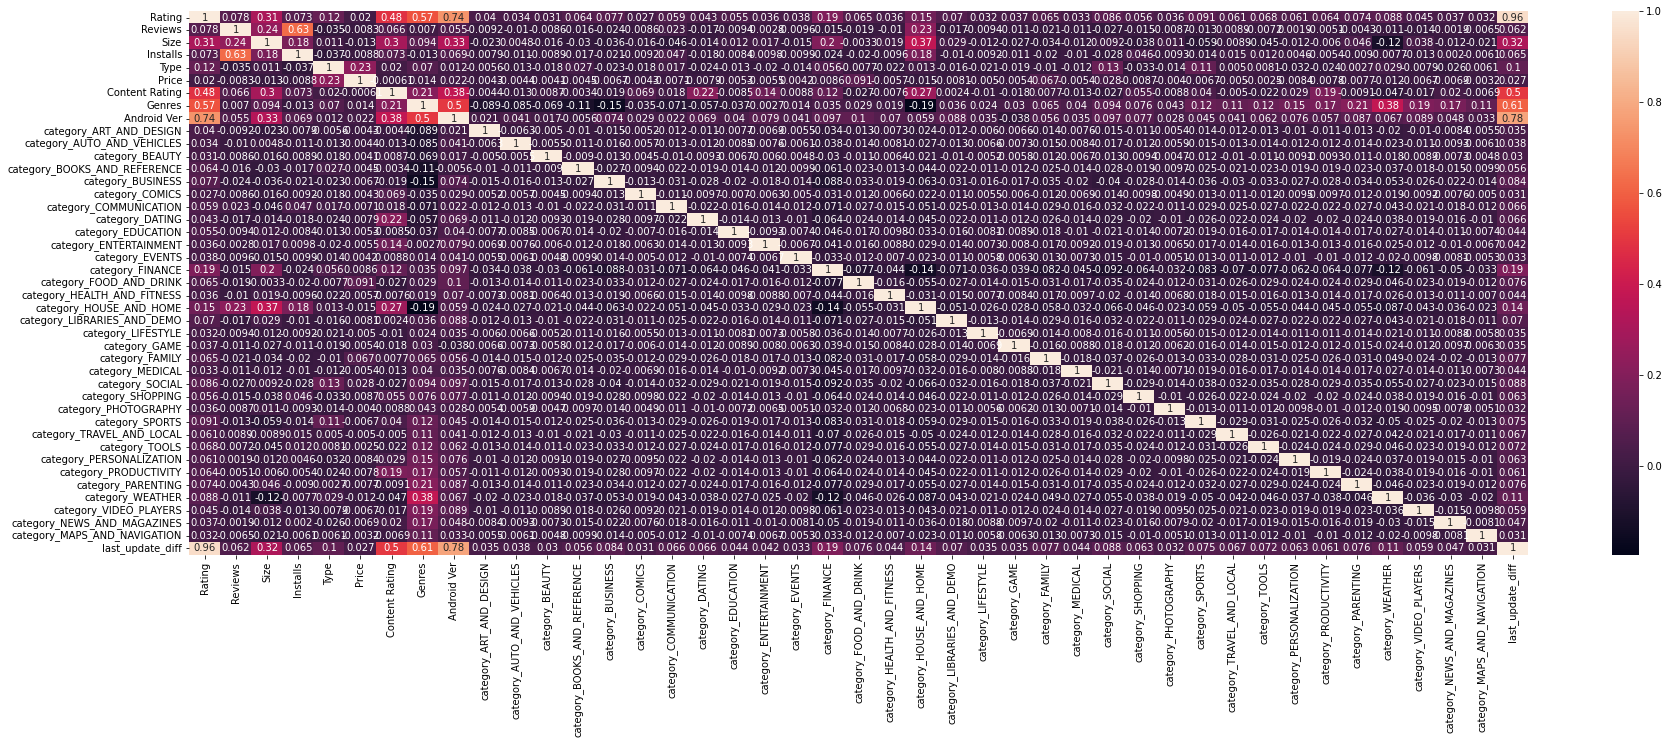

In [ ]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(30,10)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

<div dir=rtl>

מה- heatmap אשר מוצגת לפנינו, ניתן ללמוד על הקורלציה (ההתאמה) בין הפיצ'רים  הנומריים השונים בהם טיפלתי עד כה והדירוג עצמו.<br>המאפיינים הנחזים להיות הקשורים ביותר לדירוג האפליקציה (שהקורלצייה ביניהם לבין הlabel- Rating, הינה גבוהה בהרבה ביחס לפיצ'רים אחרים):
<br>
<div dir=ltr>

Size, Content Rating, Genres, Android Ver and last_update_diff.
<br>
<div dir=rtl>

ניכר כי הפיצ'רים המתארים את הקטגוריות השונות של האפליקציות של Google Play, אינן קורלטיביות לעמודת הדירוג, כמו כן הפיצ'רים:
<br> Reviews, Type, Size, Installs, עלולים להיות פחות רלוונטיים בשל הקורלצייה הנמוכה שלהן עם עמודת הדירוג.



<div dir=rtl>

כעת אפטר מהעמודות אשר עברו קידוד וכבר לא רלוונטיות (כי נוצרו עמודות חדשות במקומן):

### Preparing and Splitting the data for the models
<div dir=rtl>

כעת אמחק עמודות לא רלוונטיות ואייבא את הספריות של sklearn עבור המודלים של KNN ו Desicion Tree:

In [ ]:
x = df.drop(labels=['Rating','Category','new_date'], axis = 1)
y = df['Rating']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # מדובר הרי על בעיית ריגרסיה ולא קלסיפיקציה
from sklearn.tree import DecisionTreeRegressor # מדובר הרי על בעיית ריגרסיה ולא קלסיפיקציה
from sklearn.model_selection import train_test_split

<div dir=rtl>
כעת אפצל את הדאטה סט לשלושה חלקים (train, validation & test) ל 70-15-15:

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (7587, 42)
x_val: (1626, 42)
x_test: (1626, 42)
y_train: (7587,)
y_val: (1626,)
y_test: (1626,)


In [ ]:
x

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,category_ART_AND_DESIGN,category_AUTO_AND_VEHICLES,...,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION,last_update_diff
0,159,19000.0,10000,0,0.0,1,9,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-213
1,967,14000.0,500000,0,0.0,1,12,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-205
2,87510,8.7,5000000,0,0.0,1,9,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
3,215644,25000.0,50000000,0,0.0,4,9,18,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-61
4,967,2.8,100000,0,0.0,1,11,20,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0,9.6,10,0,0.0,1,22,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-678
10836,38,53000.0,5000,0,0.0,1,39,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-379
10837,4,3.6,100,0,0.0,1,39,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33
10838,3,9.5,1000,0,0.0,1,71,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-565


### K-Nearest Neighbors
<div dir=rtl>


<div dir=rtl>

אבדוק את ביצועי המודל בכל אחד מארבעת האפשרויות הבאות:<br><br>
1. ללא השימוש במאפיינים last_update_diff & Android Ver<br>
2. עם השימוש במאפיינים last_update_diff & Android Ver<br>
3. עם השימוש ב- Android Ver וללא השימוש ב- last_update_diff<br>
4. ללא השימוש ב- last_update_diff ועם השימוש ב- Android Ver<br>

<div dir=rtl><br>

1. כולל השימוש במאפיינים last_update_diff & Android Ver:<br>

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=20) #אתחיל לצורך העניין עם מספר של 20 שכנים
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
accuracy = knn_regressor.score(x_val,y_val)
print("The accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The accuracy, in that case, will be: 92.63 percent


In [ ]:
x

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,category_ART_AND_DESIGN,category_AUTO_AND_VEHICLES,...,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION,last_update_diff
0,159,19000.0,10000,0,0.0,1,9,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-213
1,967,14000.0,500000,0,0.0,1,12,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-205
2,87510,8.7,5000000,0,0.0,1,9,15,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
3,215644,25000.0,50000000,0,0.0,4,9,18,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-61
4,967,2.8,100000,0,0.0,1,11,20,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0,9.6,10,0,0.0,1,22,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-678
10836,38,53000.0,5000,0,0.0,1,39,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-379
10837,4,3.6,100,0,0.0,1,39,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33
10838,3,9.5,1000,0,0.0,1,71,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-565


<div dir=rtl>

2. כולל השימוש במאפיין last_update_diff  ולא ב- Android Ver:<br>

In [ ]:
x = df.drop(labels=['Rating','Category','new_date','Android Ver'], axis = 1)

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (7587, 41)
x_val: (1626, 41)
x_test: (1626, 41)
y_train: (7587,)
y_val: (1626,)
y_test: (1626,)


In [ ]:
x

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,category_ART_AND_DESIGN,category_AUTO_AND_VEHICLES,category_BEAUTY,...,category_TRAVEL_AND_LOCAL,category_TOOLS,category_PERSONALIZATION,category_PRODUCTIVITY,category_PARENTING,category_WEATHER,category_VIDEO_PLAYERS,category_NEWS_AND_MAGAZINES,category_MAPS_AND_NAVIGATION,last_update_diff
0,159,19000.0,10000,0,0.0,1,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-213
1,967,14000.0,500000,0,0.0,1,12,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-205
2,87510,8.7,5000000,0,0.0,1,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
3,215644,25000.0,50000000,0,0.0,4,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-61
4,967,2.8,100000,0,0.0,1,11,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0,9.6,10,0,0.0,1,22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-678
10836,38,53000.0,5000,0,0.0,1,39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-379
10837,4,3.6,100,0,0.0,1,39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33
10838,3,9.5,1000,0,0.0,1,71,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-565


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=20) #אתחיל לצורך העניין עם מספר של 20 שכנים
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
accuracy = knn_regressor.score(x_val,y_val)
print("The accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The accuracy, in that case, will be: 92.66 percent


<div dir=rtl>

3. כולל השימוש במאפיין Android Ver ולא ב- last_update_diff:<br>

In [ ]:
x = df.drop(labels=['Rating','Category','new_date','last_update_diff'], axis = 1)

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (7587, 41)
x_val: (1626, 41)
x_test: (1626, 41)
y_train: (7587,)
y_val: (1626,)
y_test: (1626,)


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=20) #אתחיל לצורך העניין עם מספר של 20 שכנים
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
accuracy = knn_regressor.score(x_val,y_val)
print("The accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The accuracy, in that case, will be: 92.65 percent


<div dir=rtl>

4. ללא השימוש במאפיין Android Ver וללא השימוש ב- last_update_diff:<br>

In [ ]:
x = df.drop(labels=['Rating','Category','new_date','last_update_diff','Android Ver'], axis = 1)

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (7587, 40)
x_val: (1626, 40)
x_test: (1626, 40)
y_train: (7587,)
y_val: (1626,)
y_test: (1626,)


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=20) #אתחיל לצורך העניין עם מספר של 20 שכנים
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
accuracy = knn_regressor.score(x_val,y_val)
print("The accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The accuracy, in that case, will be: 92.65 percent


<div dir=rtl>

ניכר כי הטיפול בשני השדות האלה נתן ביצועים טובים אך איתם ובלעדיהם, הביצועים נשארים טובים. אשאיר אותם, לצורך העניין, לבדיקת הביצועים על ה test.

In [ ]:
x = df.drop(labels=['Rating','Category','new_date'], axis = 1)
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

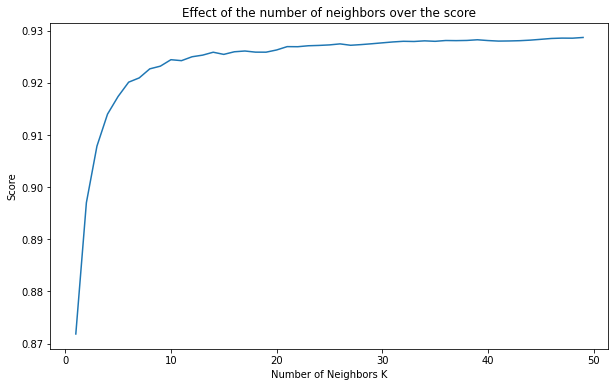

In [ ]:
scores_list = []
n_neighbors = np.arange(1, 50, 1)
for num in n_neighbors:
  knn_regressor.set_params(n_neighbors = num)
  knn_regressor.fit(x_train, y_train)
  scores_list.append(knn_regressor.score(x_val, y_val)) 

plt.figure(figsize = (10, 6))
plt.title("Effect of the number of neighbors over the score")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores_list)

In [ ]:
print("The max accuracy of the KnnRegrresor model: ", max(scores_list))
print("K value to achieve this result: ", n_neighbors[scores_list.index(max(scores_list))])

The max accuracy of the KnnRegrresor model:  0.9287050959798278
K value to achieve this result:  49


<div dir=rtl>

ניכר כי הביצועים של המודל על ה- validation set אף השתפרו.
<br>כעת, עבור k=49, אבדוק את ביצועי המודל על ה test set.

In [ ]:
knn_regressor.set_params(n_neighbors = 49)
knn_regressor.fit(x_train, y_train)
knn_regressor.score(x_test, y_test)

0.9086481108228256

### Decision Tree
<div dir=rtl>


In [ ]:
x = df.drop(labels=['Rating','Category','new_date'], axis = 1)
y = df['Rating']
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
tree_reg = DecisionTreeRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV # for tuning Hyper-Parameters to the ideal ones

In [ ]:
tuning_model = GridSearchCV(tree_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(x_train,y_train) # לוקח כ 22 דקות לבצע טיונינג על סט האימון על מנת למצוא את הפרמטרים האידיאליים עבור עץ ההחלטה

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-2.625 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-2.560 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-1.938 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-2.123 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-2.560 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the Decision Tree
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 9,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

<div dir=rtl>

כעת אשתמש בפרמטרים האידיאליים לאחר ה- tuning, עבור המודל.

In [ ]:
tuned_hyper_model = DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=9,min_weight_fraction_leaf=0.1,splitter='best')

In [ ]:
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=9,
                      min_weight_fraction_leaf=0.1)

In [ ]:
accuracy = tuned_hyper_model.score(x_val, y_val) # The Validation set score
print("The accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The accuracy, in that case, will be: 92.82 percent


In [ ]:
accuracy = tuned_hyper_model.score(x_test, y_test) # The Test set score
print("The final accuracy, in that case, will be: %s percent"%(round(accuracy*100,2)))

The final accuracy, in that case, will be: 90.78 percent


### Summary
<div dir=rtl>

לאחר עבודה על הדאטה הטבלאי - המרה של ערכים אלפא-נומריים לנומריים, קידוד ע"פ שתי שיטות הקידוד שלמדנו (Label Encoding and One-Hot Encoding) וחיתוך בין פיצ'רים שונים על מנת לקבל הבנה חדשה, כל אלה הביאו להכנה טובה של המידע ושל הפיצ'רים, על מנת לקבל ביצועים טובים בשני המודלים הנ"ל.<br>לבסוף, בעזרת tuning ומציאת ה- HyperParameters האידיאלים,  התקבלו ביצועים טובים אשר מנבאים בצורה טובה, את דירוג האפליקציות של חנות הGoogle Play.